# Simple Linear Regression implementation from scratch

#### Day 3 was spent in learning the fundamentals of simple linear regression and the indepth math about the optimisation techniques and thee accuracy metrics. Today, that is on day 4, is the implementation part. The simple linear regression is to be implemented using all three optimisation techniques, namely:
1. Batch Gradient Descent
2. Stochastic Gradient Descent
3. Mini Batch Gradient Descent

## First, let's import the necessary libraries.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from random import random, shuffle, randint
import os
%matplotlib inline

#### For this, the GRE scores v/s Chance of Admission dataset. Here the dependant variable will be the chance of Admit and the independant variable will be the GRE scores. We can take the inverse of this too, and it **will imply correlation**, but it **doesn't imply causation.** Hence the choice. 
## Now let's import the dataset

In [2]:

os.chdir('/home/thedarkcoder/Desktop/Projects/51 days of ML/Simple linear regression project/')
dataset = pd.read_csv('Admission_Predict.csv')

## Let's take a look at the data

In [143]:
print(dataset.sample(10))
print("\nLength - " + str(len(dataset)) +"\n")
print("Null values - ")
print(dataset.isnull().sum())

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
112         113        301          107                  3  3.5   3.5  8.34   
339         340        324          107                  5  3.5   4.0  8.66   
91           92        299           97                  3  5.0   3.5  7.66   
259         260        331          119                  4  5.0   4.5  9.34   
59           60        311          104                  2  2.0   2.0  8.30   
130         131        339          114                  5  4.0   4.5  9.76   
156         157        315          105                  3  2.0   2.5  8.34   
187         188        335          118                  5  4.5   3.5  9.44   
390         391        314          102                  2  2.0   2.5  8.24   
149         150        311          106                  2  3.5   3.0  8.26   

     Research  Chance of Admit   
112         1              0.62  
339         1              0.81  
91          0              0

#### No missing data. Hence, no need for preprocessing.
## Now let's select the dependent and independent variables. 
#### Since we are doing simple linear regression, we will chose only one dependent variable

In [144]:
X = dataset["GRE Score"]
y = dataset.iloc[:, -1]
print(X, "\n", y)

0      337
1      324
2      316
3      322
4      314
      ... 
395    324
396    325
397    330
398    312
399    333
Name: GRE Score, Length: 400, dtype: int64 
 0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64


## Now let's plot the data and check the relation.

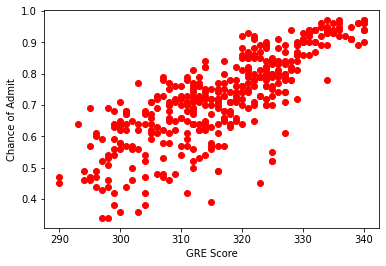

In [152]:
plt.scatter(X, y, c="red")
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admit")
plt.show()

#### The data looks linear. Now,
## Lets build a simple linear regression model

In [164]:
class SimpleLinearRegression:
    def __init__(self, lr=0.001, epoch=10000, optimizer='grad'):
        self.weight = 0.0
        self.constant = 0.0
        self.learning_rate = lr
        self.epochs = epoch
        self.optimizer = optimizer
    def fit(self, X, y):
        N = len(X)
        maximum = max(X)
        X = X/maximum
        for _ in range(self.epochs):
            y_pred = self.weight * X + self.constant
            self.grad_descent(X, y, y_pred, N)
        self.weight = self.weight/maximum
    def predict(self, X):
        return self.weight * X + self.constant
    def grad_descent(self, X, y, y_pred, N):
        dw = (y_pred - y).dot(X)
        db = np.array(sum((y_pred - y)))
        self.weight -= self.learning_rate * dw
        self.constant -= self.learning_rate * db

## Let's split our data into training and testing datasets

In [165]:
X_train = np.array(X[:-40])
y_train = np.array(y[:-40])
X_test, y_test = np.array(X[-40:]), np.array(y[-40:])
print(y_train.shape)

(360,)


## Creating the simple linear regression class object
The fit function fits the data into the linear regression model and gives the parameters of the best fit line, which are the weights or coefficients and constant also called as intercept or bias.

In [166]:
lr = SimpleLinearRegression(epoch=100000)
lr.fit(X_train, y_train)

In [167]:
lr.weight

0.009691298767553154

In [168]:
lr.constant

-2.345455164566775

## Plotting the best fit line

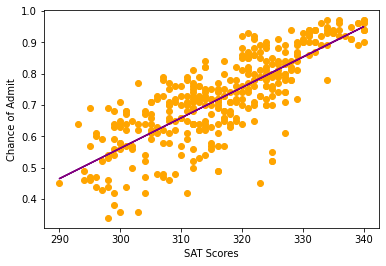

In [169]:
plt.plot(X_train, lr.weight * X_train + lr.constant, color="purple")
plt.xlabel("SAT Scores")
plt.ylabel("Chance of Admit")
plt.scatter(X_train, y_train, color="orange")

## Checking the predictions for the testing dataset

In [179]:
print(lr.predict(X_test))
y_test

[0.77514304 0.89143862 0.93020382 0.62008226 0.68792135 0.85267343
 0.75576044 0.66853875 0.54255187 0.57162576 0.65884745 0.79452564
 0.91082122 0.76545174 0.70730395 0.60069966 0.53286057 0.46502148
 0.59100836 0.66853875 0.77514304 0.74606914 0.79452564 0.56193447
 0.94958642 0.90112992 0.58131706 0.62977356 0.52316927 0.75576044
 0.69761265 0.73637784 0.81390823 0.72668654 0.84298213 0.79452564
 0.80421693 0.85267343 0.67823005 0.88174733]


array([0.85, 0.93, 0.91, 0.69, 0.77, 0.86, 0.74, 0.57, 0.51, 0.67, 0.72,
       0.89, 0.95, 0.79, 0.39, 0.38, 0.34, 0.47, 0.56, 0.71, 0.78, 0.73,
       0.82, 0.62, 0.96, 0.96, 0.46, 0.53, 0.49, 0.76, 0.64, 0.71, 0.84,
       0.77, 0.89, 0.82, 0.84, 0.91, 0.67, 0.95])

## Let's check with the scikit learn module

In [160]:
from sklearn.linear_model import LinearRegression

sklr = LinearRegression()
sklr.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

In [161]:
sklr.intercept_

-2.345455166107054

In [162]:
sklr.coef_

array([0.0096913])

## Their coefficients are 0.0096913 and intercept is -2.345455166 which is very very close to ours.

# Success!!